In [1]:
import os, sys
import uproot, awkward
import ROOT as rt
import numpy as np
from array import array
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

Welcome to JupyROOT 6.26/02


In [2]:
inFile_k100 = '/Users/shubhampandey/work/NuclearCascade/nrcascade_10k_randomized.root'
#inFile_k100 = '/Users/shubhampandey/work/geant4/k100sim_anthony/sim_files/sim_300M_PuBe_sourceAndshields_boronBox_walls_shields/sim_300M_PuBe_sourceAndshields_boronBox_walls_floor_boronShield_V6H6_2inch.root'

file_k100 = uproot.open(inFile_k100)
if(not file_k100):
    print("could not open file: %s"%(inFile_k100))
    sys.exit(0)
    
tree_k100 = file_k100["cascade"]

if(not tree_k100):
    print("cascade does not exist in file: %s"%(file_k100))
    sys.exit(0)

save_ = False

### livetime : 21.8 seconds for 50 M events

In [3]:

# From nrCascadeSim
I = tree_k100["I"].array(library="np")
nI = tree_k100["nI"].array(library="np")
Ei = tree_k100["Ei"].array(library="np")
n = tree_k100["n"].array(library="np")
Eg = tree_k100["Eg"].array(library="np")


In [5]:
df = pd.DataFrame( {'I' : I,
                  'nI' : nI,
                  'Ei' : Ei,
                  'n' : n,
                    'Eg' : Eg}
                 )
df.head(5)

,I,nI,Ei,n,Eg
0,"[0.0, 37.0, 0.0]",3,"[0.2548036623088379, 162.69738691133136, 3.842...",3,"[3.5391700000000004, 3.6610200000000006, 1.27337]"
1,"[0.0, 62.0]",2,"[0.6621179978031435, 229.44491608734793]",2,"[3.5391700000000004, 4.9343900000000005]"
2,"[0.0, 20.0, 2.0]",3,"[1.1920971352382495, 81.3000776748369, 11.1692...",3,"[3.5391700000000004, 3.6610200000000006, 1.27337]"
3,"[0.0, 68.0]",2,"[0.046781459286796334, 251.39197778782102]",2,"[2.0929800000000007, 6.38058]"
4,"[0.0, 26.0]",2,"[0.06860521014838383, 103.6100441900601]",2,"[3.5391700000000004, 4.9343900000000005]"


Warning in <TROOT::Append>: Replacing existing TH1: h_Egamma (Potential memory leak).


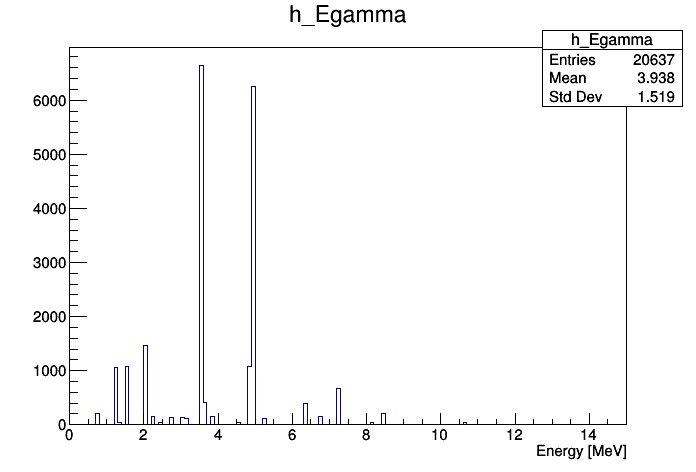

In [9]:
c = rt.TCanvas()
h_Egamma = rt.TH1F('h_Egamma','Energy of each photon',150,0,15)
h_Egamma.GetXaxis().SetTitle('Energy [MeV]')

for gammas in Eg:
    for gamma in gammas:
        h_Egamma.Fill(gamma)

h_Egamma.Draw()
#rt.gPad.SetLogy()
c.Draw()
        

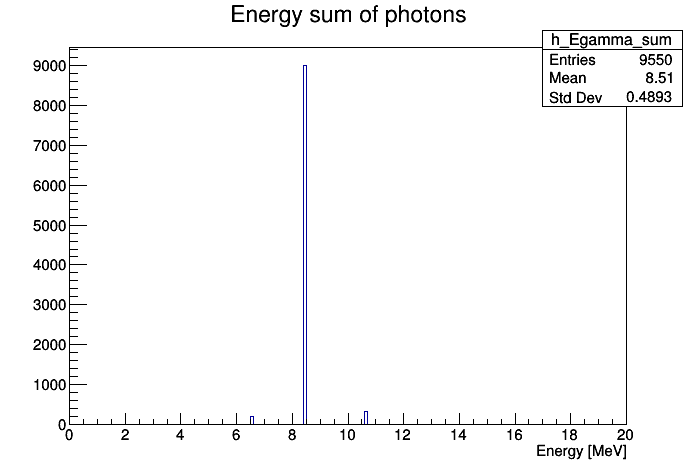

In [10]:
c = rt.TCanvas()
h_Egamma_sum = rt.TH1F('h_Egamma_sum','Energy sum of photons',200,0,20)
h_Egamma_sum.GetXaxis().SetTitle('Energy [MeV]')

for gammas in Eg:
    h_Egamma_sum.Fill(np.sum(gammas))

h_Egamma_sum.Draw()
#rt.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h_Egamma_sum (Potential memory leak).


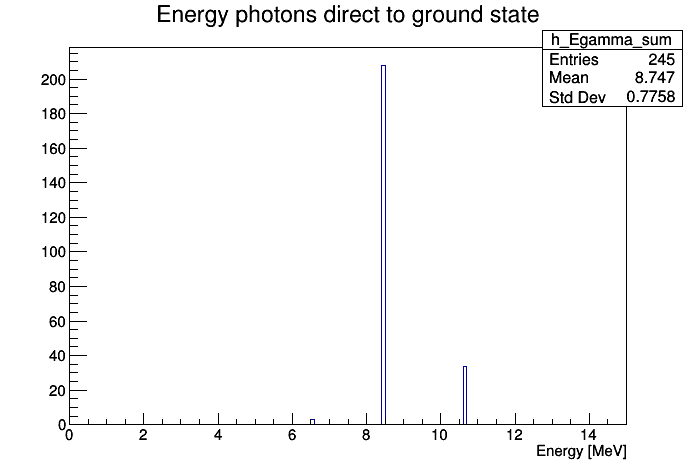

In [12]:
gamma_direct_to_grnd_st = df[df.n == 1].Eg
c = rt.TCanvas()
h_Egamma_grnd = rt.TH1F('h_Egamma_sum','Energy photons direct to ground state',150,0,15)
h_Egamma_grnd.GetXaxis().SetTitle('Energy [MeV]')

for gamma in gamma_direct_to_grnd_st:
    h_Egamma_grnd.Fill(gamma)

h_Egamma_grnd.Draw()
c.Draw()

In [13]:
Ei.shape

(9550,)

Warning in <TROOT::Append>: Replacing existing TH1: h_Ei_sum (Potential memory leak).


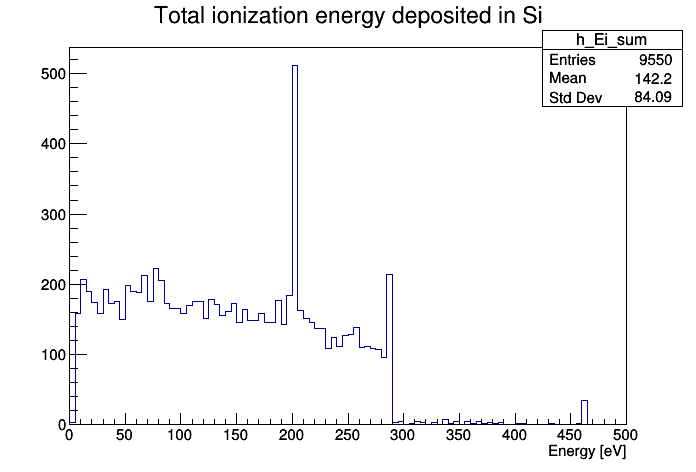

In [17]:
c = rt.TCanvas()
h_Ei_sum = rt.TH1F('h_Ei_sum','Total ionization energy deposited in Si',100,0,500)
h_Ei_sum.GetXaxis().SetTitle('Energy [eV]')

for E in Ei:
    h_Ei_sum.Fill(np.sum(E))

h_Ei_sum.Draw()
#rt.gPad.SetLogy()
c.Draw()